DataSet Shape (200, 4)
Checking for null values
 CustomerID        0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
Duplicates  0
Data types
 CustomerID        int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

 Summary Staststics 
        CustomerID        Age  Annual Income  Spending Score
count  200.000000  200.00000     200.000000      200.000000
mean   100.500000   43.42500   65777.545000       49.620000
std     57.879185   14.94191   30403.022894       29.197226
min      1.000000   18.00000   15301.000000        1.000000
25%     50.750000   31.00000   39804.000000       24.000000
50%    100.500000   43.50000   64959.500000       50.000000
75%    150.250000   56.00000   89960.500000       70.750000
max    200.000000   69.00000  119095.000000      100.000000

 Processed Data    CustomerID       Age  Annual Income  Spending Score
0           1  0.843704       0.239901        0.287734
1           2  1.715924      -0.

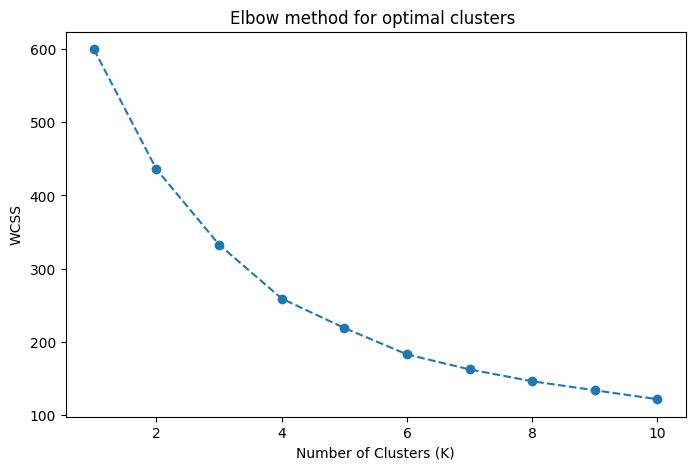

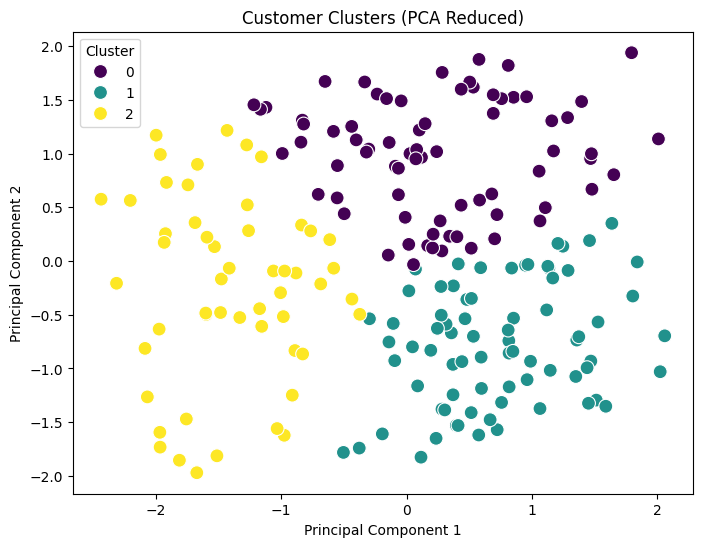

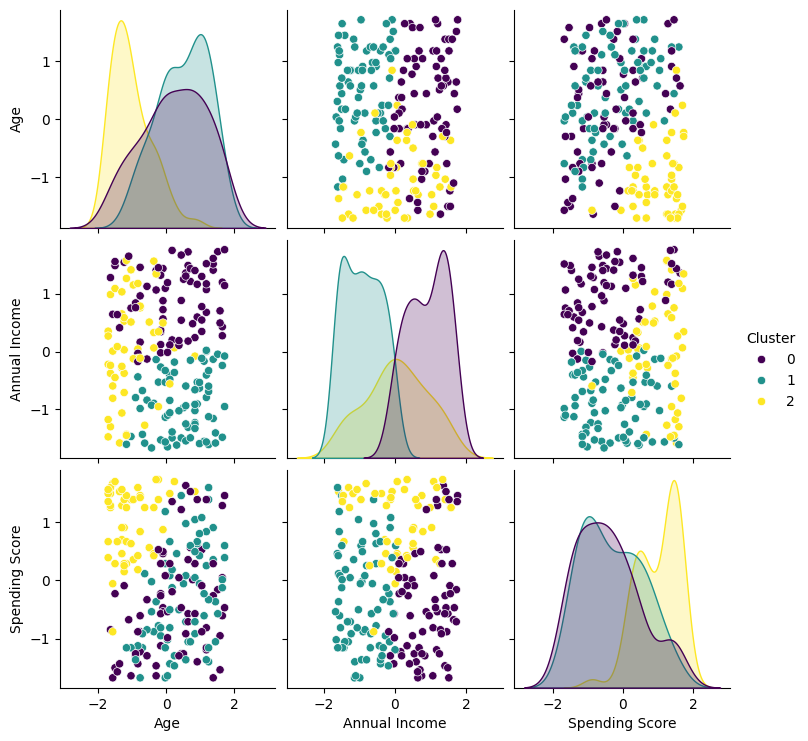

Cluster Centroids:
          Age  Annual Income  Spending Score
0  46.821918   93060.575342       37.808219
1  50.786667   38428.120000       41.093333
2  28.038462   66922.653846       78.500000


In [15]:

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#1)load the dataset
df = pd.read_csv("d:\Mainflow-internship\week3tasks\customer_data.csv")
df.columns = df.columns.str.strip()  
##  Data Inspection
print("DataSet Shape",df.shape)
print("Checking for null values\n", df.isnull().sum())
print("Duplicates ",df.duplicated().sum())
print("Data types\n",df.dtypes)
print("\n Summary Staststics \n",df.describe())

df=df.drop_duplicates()
df.dropna(inplace=True) 

#2)Standardize the data
#  Feature Selection & Scaling
num_features=['Age','Annual Income','Spending Score']
scaler = StandardScaler()  
df[num_features]=scaler.fit_transform(df[num_features])
print("\n Processed Data",df.head())

df.to_csv("preprocessed_customer_data.csv",index=False)

# 3. Determine Optimal Clusters using the Elbow Method
wcss = []  
K_values = range(1, 11)  

for k in K_values:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(df[num_features])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_values,wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow method for optimal clusters ")

##Silhouette Score for evaluation.
silhouette_scores = []
for k in range(2, 11):  # Silhouette Score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df[num_features])
    score = silhouette_score(df[num_features], cluster_labels)
    silhouette_scores.append(score)

## ApplyK-Means Clustering   with the Optimal Number of Clusters
optimal_k=3
kmeans=KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
df["Cluster"] = kmeans.fit_predict(df[num_features])
df.to_csv("Clusterd_Customer_data.csv",index=False)
print("\n Clusterd Data \n",df.head())

##4.Visualization  2D Scatter Plot (Using PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[num_features])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title("Customer Clusters (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

##Visualize relationships between features within clusters. using pairplots
sns.pairplot(df, hue="Cluster", vars=num_features, palette='viridis')
plt.show()

## Cluster Centroids for Interpretation.
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=num_features)
print("Cluster Centroids:\n", centroids)